## Directing Customers to Subscription Products through App Behavior Analysis

### Introduction

It is not uncommon in todays market for many companies to have a mobile presence. Frequently, a free product or service provided by the company through it's mobile app will attempt to transition customers to a paid subscription. Examples of this include YouTube Red or Spotify Premium. Given the costs associated with marketing, companies benefit from quality targeted ads.

The market, product, and goal of this project are outlined below:

#### Market:
The target audience is comprised of customers using a company's free product. Specifically in this project, this refers to users who have installed and used the company's free mobile app.

#### Product: 
Paid memberships typically provide enhanced versions of free products, as well as offering new features. For example, Spotify premium does not have ads and lets mobile users stream the exact music they want, when they want. 

#### Goal:
The model developed attempts to predict which users are or are not likely to subscribe to a paid membership, so that resources can be effectively utilized at targeting users to convert them into paying customers. 

### Business Challenge

In this workbook, I'm going to imagine that the model is being developed for a fintech company that want to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. In order to draw in customers, the company has a free versions of their app with some of the main features unlocked.

The company has asked for users who are **NOT** likely to enroll in the paid product to be identified, so that additional offers can be targeted to them. Since there is a cost associated with these offers, the company would not want to offer them to everyone, especially customers who appear to be likely to subscribe to a paid membership already.

### Data

In working for the company, one would have access to each customer's app behaviour data. This data includes the data and time of app installation, as well as the features which the users engaged within the app. App behaviour is characterized as the list of app screens the user looked at, and wheteher the user played the financial mini-games available.

The app usage data is only from  the user's first day in the app. This limit exists as users are able to enjoy a 24-hour free trial of premium features, and gives the company the oppotunity to target them with new offers shortly after the trial is over. 

Using the Pandas library, the dataset for this can be inspected.

In [2]:
import pandas as pd
customer_data = pd.read_csv('appdata10.csv')
customer_data.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


- user is a unique numerical ID that represents a user of the application. 
- first_open displays the day and time that a user first opened the application.
- dayofweek represents the day of the week when the user first opened the app in numerical form, where 0 means Sunday, 1 means Monday, ..., and 6 means Saturday.
- hour is the hour of day when the user first opened the app.
- age is the age of the user.
- screen_list is a list of every single app screen names that the user visited in the first 24 hours.
- numscreens is the number of screens that appear in the screen_list for a particular user.
- minigame is a boolean value representing whether or not the user played the financial mini-game.
- liked is a boolean value representing whether or not the user 'liked' at least a single feature of the app.
- used_premium_feature is a boolean value representing whether or not the user used a premium feature during their free trial.
- enrolled is a boolean value representing whether or not the the user paid for a premium subscription for the app. This is also refered to as the response variable of this project.
- enrolled_date displays the day and time that a user enrolled for a premium subscription of the app.

With the .describe() method, it is possible to gather more information about the dataset.

In [5]:
customer_data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Features Histrograms

To start exploratory data analysis, 3rd party libraries need to be imported.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

#### Data Cleaning

First, the data in the hour field of the dataset has to be converted to a type which is more "friendly" to use.

In [9]:
customer_data['hour'] = customer_data.hour.str.slice(1, 3).astype(int)

#### Plotting

To plot a histogram, a dataset which does not contain columns that are undesirable needs to be created.

In [11]:
hist_dataset = customer_data.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [12]:
hist_dataset.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


This dataset only has numerical values, which are usable in histogram generation (unlike str).

#### Histograms

Histrograms are useful in that they allow you to become very familiar with the distributions of the datasets.

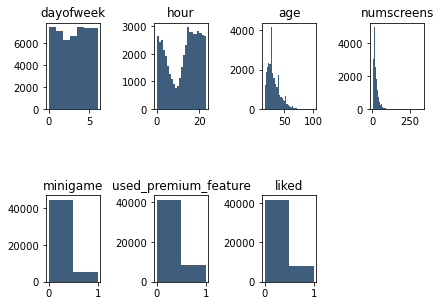

In [86]:
plt.subplots_adjust(left=0.125, bottom=0.1, right=1, top=1, wspace=1, hspace=1)
for feature in range(1, hist_dataset.shape[1] + 1):
    plt.subplot(2, 4, feature)
    f = plt.gca()
    f.set_title(hist_dataset.columns.values[feature - 1])
    
    vals = np.size(hist_dataset.iloc[:, feature - 1].unique())
    
    plt.hist(hist_dataset.iloc[:, feature - 1], bins=vals, color='#3F5D7D')

From these plots, some trends become clear. 
- dayofweek has an even distribution and does not have a strong correlation between users getting a premium subscription.
- hour (UTC) demonstrates that those who installed the app very late at night did not tend to opt for a premium subscription.
- age shows a mostly even distribution, with a tail towards the older ages. There are also a few noticable outliers around 30, 41, and just after 50. 
- numscreens also has a very even distribution with a few outliers much like age.
- minigame, used_premium_feature, and liked all show similar data (that most people had a 0 value, indicating a False for either use or like).

### Correlation Plot